# Explore here

                   nombre         artista  popularidad  duracion_ms  \
0         Romeo y Julieta  Eladio Carrion           80       206946   
1  El Reggaetón del Disco  Eladio Carrion           79       203750   
2               Vetements  Eladio Carrion           79       200000   

       audio_url                                          cover_art  \
0  No disponible  https://i.scdn.co/image/ab67616d0000b273e83df0...   
1  No disponible  https://i.scdn.co/image/ab67616d0000b273e83df0...   
2  No disponible  https://i.scdn.co/image/ab67616d0000b273e83df0...   

   duracion_min  
0      3.449100  
1      3.395833  
2      3.333333  


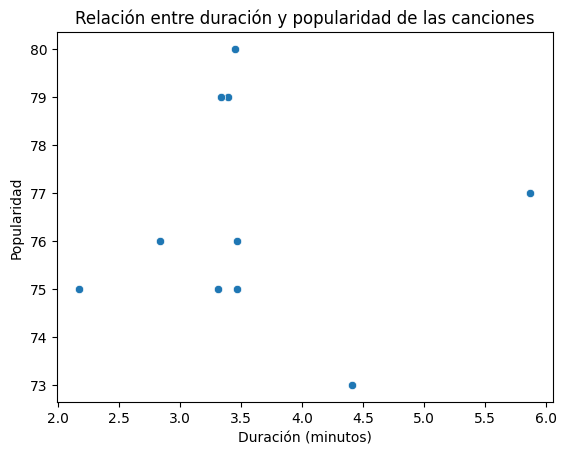

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns

# cargar variables del archivo .env
load_dotenv()

# verificar credenciales
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# inicializar cliente de Spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

# URI correcto sin parámetros adicionales
lz_uri = 'spotify:artist:5XJDexmWFLWOkjOEjOVX3e'

# obtener las top tracks del artista
results = spotify.artist_top_tracks(lz_uri)

# crear lista para guardar datos
tracks_data = []

# listar las primeras 10 canciones
for track in results['tracks'][:10]:
    tracks_data.append({
        'nombre': track['name'],
        'artista': track['album']['artists'][0]['name'],
        'popularidad': track['popularity'],
        'duracion_ms': track['duration_ms'],
        'audio_url': track['preview_url'] or 'No disponible',
        'cover_art': track['album']['images'][0]['url']
    })
# Convertir la lista en DataFrame
df = pd.DataFrame(tracks_data)
df['duracion_min'] = df['duracion_ms'] / 60000  # de ms a minutos

# Ordenar por popularidad s
df_ordenado = df.sort_values(by='popularidad', ascending=False)

# Mostrar las 3 canciones con mayor popularidad
top3_mas_populares = df_ordenado.head(3)

print(top3_mas_populares)

#grafica
sns.scatterplot(data=df, x='duracion_min', y='popularidad')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.title('Relación entre duración y popularidad de las canciones')
plt.show()

""No se observa una relación clara o consistente entre la duración de las canciones y su popularidad. Las canciones más populares tienen duraciones bastante similares (alrededor de 3.3 a 3.5 minutos), pero dentro del conjunto total de canciones, no hay una tendencia fuerte que indique que las canciones más cortas o más largas sean necesariamente más populares.""